# Unit 5 - Financial Planning


In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv("john.env")                   # CODER'S NOTE: I have a .gitignore on my github, you'll need to use your own API keys.

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Execute 2 seprate GET requests to the URL's 
btc_get_response = requests.get(btc_url)
eth_get_response = requests.get(eth_url)

In [7]:
# Output is to be stored in json format.

import json    # we want the json import so we can output data and run index lookups on them easily. 

#crypto_prices = crypto_get_response_data.json()

btc_price_data = btc_get_response.json()
eth_price_data = eth_get_response.json()

#print(json.dumps(crypto_prices, indent=4))

In [8]:
# BTC json data
print(json.dumps(btc_price_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18670106,
            "total_supply": 18670106,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 58892.0,
                    "volume_24h": 57309159753,
                    "market_cap": 1095797481035,
                    "percentage_change_1h": 0.190687896622515,
                    "percentage_change_24h": 0.41523481036819,
                    "percentage_change_7d": 7.89150175948674,
                    "percent_change_1h": 0.190687896622515,
                    "percent_change_24h": 0.41523481036819,
                    "percent_change_7d": 7.89150175948674
                },
                "CAD": {
                    "price": 73968.352,
                    "volume_24h": 71980304649.768,
                    "mar

In [9]:
# ETH json dumps data
print(json.dumps(eth_price_data, indent =4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 115282159,
            "total_supply": 115282159,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1922.13,
                    "volume_24h": 28997404547,
                    "market_cap": 220920176298,
                    "percentage_change_1h": -0.387305734074723,
                    "percentage_change_24h": 4.41070523793683,
                    "percentage_change_7d": 14.8323900100427,
                    "percent_change_1h": -0.387305734074723,
                    "percent_change_24h": 4.41070523793683,
                    "percent_change_7d": 14.8323900100427
                },
                "CAD": {
                    "price": 2414.19528,
                    "volume_24h": 36420740111.032,
                   

In [10]:
# Fetch current BTC price
btc_price = btc_price_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_price = eth_price_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $70670.40
The current value of your 5.3 ETH is $10187.29


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Current amount of shares
shares_data = {
    'shares': [200, 50]
}

In [12]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [13]:
# Testing if API keys imported correctly.
print(f"ALPACA_API_KEY type is: {type(alpaca_api_key)}")
print(f"ALPACA_SECRET_KEY type is: {type(alpaca_secret_key)}")

ALPACA_API_KEY type is: <class 'str'>
ALPACA_SECRET_KEY type is: <class 'str'>


In [21]:
# Format current date as ISO format
current_date = pd.Timestamp('2021-03-30', tz='America/New_York' ).isoformat()
end_date = pd.Timestamp('2021-03-30', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_closing_prices = api.get_barset(
    tickers,
    timeframe,
    start=current_date,
    end=end_date
).df                                     # don't forget the .df!!!

# Preview DataFrame
df_closing_prices.head()

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-03-30 00:00:00-04:00  113.64  113.85  113.525  113.82  4742520  394.42   

                                                             
                             high     low   close    volume  
time                                                         
2021-03-30 00:00:00-04:00  395.45  393.02  394.78  63446300

In [23]:
# CODER'S NOTE: This cell worked perfectly fine before, and now it is returning a cannot covert float error.
# if I remove the float the cell runs but not correctly.

# Pick AGG and SPY close prices
agg_close_price = float(df_closing_prices['AGG']['close'])     
spy_close_price = float(df_closing_prices['SPY']['close'])                
                                                                      

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${round(agg_close_price, 2)}")
print(f"Current SPY closing price: ${round(spy_close_price, 2)}")

Current AGG closing price: $113.82
Current SPY closing price: $394.78


In [24]:
# Created a dataframe to display my investment portfolio. 
# It should be AGG = 200, SPY = 50
df_shares  = pd.DataFrame(shares_data, index=tickers)
df_shares

,shares
AGG,200
SPY,50


In [25]:
# Compute the current value of shares
my_spy = df_shares.loc['SPY']['shares']
my_agg = df_shares.loc['AGG']['shares'] 

my_spy_value = my_spy * spy_close_price 
my_agg_value = my_agg * agg_close_price  

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19739.00
The current value of your 200 AGG shares is $22764.00


### Savings Health Analysis

In [26]:
# Set monthly household income
monthly_income = 12000

# Calculate total crypto and total shares values. 
total_crypto_value = my_btc_value + my_eth_value
total_shares_value = my_spy_value + my_agg_value

# Store our total value of all savings in a dict.
total_savings = {
    'crypto': [total_crypto_value],
    'shares': [total_shares_value]
}

# Create savings DataFrame
# CODER'S NOTE: This isn't returning the right data. See next cell where DataFrame defined. 
#df_savings = pd.DataFrame(
    #[total_savings], 
     #columns=['amount'])    


# Display savings DataFrame
#df_savings.head()                              #CODER'S NOTE: Not returning the data in the DataFrame. See next cell for DataFrame

In [27]:
# CODER'S NOTE: Made the DataFrame of our savings here. I wanted to use a dict like previous class examples. But it didn't work so I manually made here.

df_savings = pd.DataFrame(
    [total_crypto_value, total_shares_value],
    ['crypto', 'shares'],
    columns = ['amount']
)
df_savings.head()

,amount
crypto,80857.689
shares,42503.000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

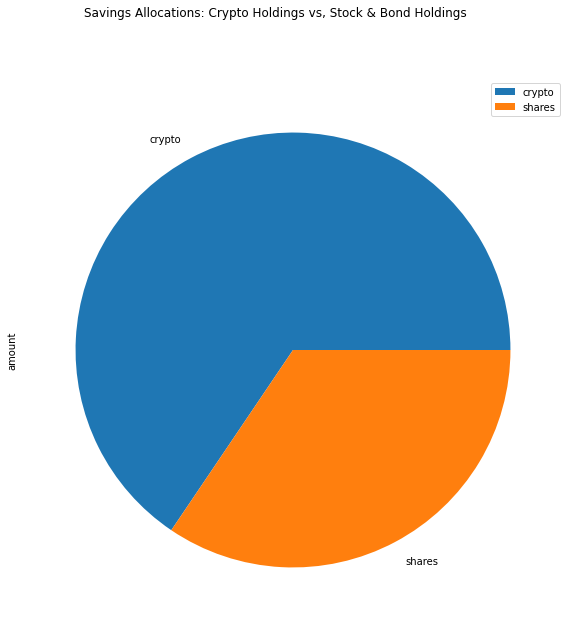

In [28]:
# Plot savings pie chart
df_savings.plot.pie(title="Savings Allocations: Crypto Holdings vs, Stock & Bond Holdings", subplots=True, figsize=[20,10])

In [29]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_value + total_shares_value

# Validate saving health
if total_savings > emergency_fund:
    financial_coverage = int(total_savings / monthly_income)
    print(f"You have a solid savings fund. That should last you {financial_coverage} months.")
elif total_savings == emergency_fund:
    print(f"You have exactly three months worth of savings based on your income level. But it wouldn't hurt to save extra.")
elif total_savings < emergency_fund:
    print(f"You are only saving {(emergency_fund - total_savings)/emergency_fund:0.2f}% so far of what you should have.")
else:
    print("Stop wasting your money on downloadable $60 Nintendo Switch games and save your money now!")

You have a solid savings fund. That should last you 10 months.


In [31]:
print(f"${total_savings:0.2f}")

$123360.69


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
start_date = pd.Timestamp('2020-03-30', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-29', tz='America/New_York').isoformat()

df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
#df_stock_data = df_stock_data.index.date
df_stock_data.head()

AGG                                       \
                             open     high     low     close    volume   
time                                                                     
2020-03-30 00:00:00-04:00  115.77  116.260  115.62  115.6575  20389702   
2020-03-31 00:00:00-04:00  115.71  115.980  115.23  115.4300  24125072   
2020-04-01 00:00:00-04:00  115.38  115.400  114.65  114.8600  22701910   
2020-04-02 00:00:00-04:00  115.02  115.220  114.70  114.9500  22656542   
2020-04-03 00:00:00-04:00  114.95  115.125  114.28  115.0000  18453316   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-03-30 00:00:00-04:00  255.70  262.4300  253.53  261.68  139095982  
2020-03-31 00:00:00-04:00  260.56  263.3300  256.22  257.70  159223028  
2020-04-01 00:00:00-04:00  247.98  257.6591  243.90  246.12  170515975  
2020-04-02 00:00:00-04:00  245.19  252.6800  244.59  251.87  155820022  
2020-04-03 00:00:00-04:00  250.76  253.3200  245.22  248.21  119985873

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [19]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                       \
                             open     high     low     close    volume   
time                                                                     
2020-03-30 00:00:00-04:00  115.77  116.260  115.62  115.6575  20389702   
2020-03-31 00:00:00-04:00  115.71  115.980  115.23  115.4300  24125072   
2020-04-01 00:00:00-04:00  115.38  115.400  114.65  114.8600  22701910   
2020-04-02 00:00:00-04:00  115.02  115.220  114.70  114.9500  22656542   
2020-04-03 00:00:00-04:00  114.95  115.125  114.28  115.0000  18453316   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-03-30 00:00:00-04:00          NaN  255.70  262.4300  253.53  261.68   
2020-03-31 00:00:00-04:00    -0.001967  260.56  263.3300  256.22  257.70   
2020-04-01 00:00:00-04:00    -0.004938  247.98  257.6591  243.90  246.12   
2020-04-02 00:00:00-04:00     0.000784  245.19  252.6800  244.59  251.87   
2020-04-03 00:00:00-04:00     0.000435  250.76  253.3200  245.22  248.21   

                                                   
                              volume daily_return  
time                                               
2020-03-30 00:00:00-04:00  139095982          NaN  
2020-03-31 00:00:00-04:00  159223028    -0.015209  
2020-04-01 00:00:00-04:00  170515975    -0.044936  
2020-04-02 00:00:00-04:00  155820022     0.023363  
2020-04-03 00:00:00-04:00  119985873    -0.014531

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007893,1.008467,1.001854,1.010781,1.001563,1.009188,0.982485,1.002645,1.010527,1.006971,...,1.007853,0.991904,1.012372,0.998383,1.005611,0.990744,0.990531,0.999531,1.005454,0.999756
2,1.010548,1.020057,1.004583,1.003011,1.010401,1.016473,0.973116,1.008307,1.003662,1.005017,...,1.004494,0.997219,0.989249,0.995660,1.009183,1.004952,0.989203,0.992643,0.991475,0.994068
3,1.001599,1.021970,1.001264,1.004896,0.998354,1.025921,0.980793,1.002496,0.997147,1.013429,...,1.011522,1.006400,0.985903,0.997660,0.992421,1.014165,0.998712,0.994512,0.991029,0.981045
4,1.000602,1.027200,1.005696,1.005720,0.991911,1.019263,0.990096,0.998633,1.007479,1.012359,...,1.027001,0.998075,0.993572,1.010193,0.989507,1.012294,1.007601,1.003750,1.009133,0.986838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4103.610963,1800.172164,1819.834323,1767.021270,588.398687,1302.651610,1301.442155,2553.642367,1095.232399,1921.790793,...,4175.493740,2549.235802,4250.135444,1805.870660,752.371463,687.418039,801.056203,1026.989675,921.501985,3129.250591
7557,4100.031048,1774.451564,1808.565489,1766.987597,585.797404,1308.815591,1291.972052,2554.824777,1087.462385,1883.096194,...,4191.636263,2566.852241,4257.796793,1808.667505,745.578836,692.935869,808.180720,1013.151524,920.503799,3164.602064
7558,4075.043029,1768.082900,1796.404210,1761.579527,584.177986,1339.115011,1285.990853,2532.886963,1109.270361,1885.626047,...,4168.275642,2590.448526,4292.095565,1810.311651,760.019261,692.416731,809.387312,1002.564312,913.745268,3209.705684
7559,4029.477026,1775.871338,1815.800456,1758.732597,594.485742,1343.449817,1271.598495,2550.152290,1113.731324,1894.159375,...,4211.835554,2608.007313,4290.872741,1812.570428,755.486496,688.764597,806.980427,988.498769,914.683144,3234.694418


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

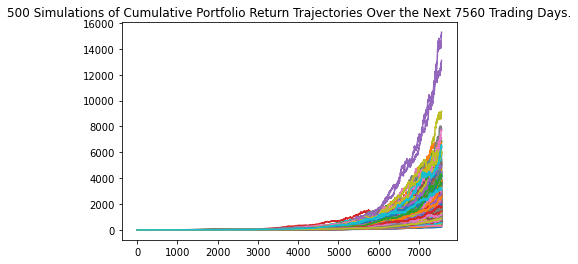

In [21]:
# Plot simulation outcomes
MC_thirty_year.plot_simulation()

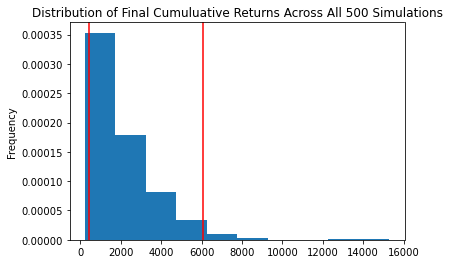

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

In [ ]:
# CODER'S NOTE:
# Definitely not a normal curve distribution. Very likely volatile with a lot of risk.
# Confidence levels are very large between 1 and 6000. 

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count             500.000000
mean             2137.672001
std              1669.052423
min               225.950436
25%              1013.321403
50%              1653.656011
75%              2823.938992
max             15284.988931
95% CI Lower      431.604404
95% CI Upper     6045.534123
Name: 7560, dtype: float64


In [ ]:
# CODER'S NOTE:
# Our average returns [mean] is 2137.7
# Risk [std] is HIGH at 1669.1, this is reflective in the shape of the distribution curve.
# Worst case scenario [min]: $1 invested in the portfolio can lose $225.95 in value during the THIRTY years.
# Best case senario [max]: $ 1 invested in the portfolio can gain $15,285 in value during the THIRTY years.
# 95% of the time it is projected that $1 in portfolio can become $6,045 in THIRTY years. 

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0.2f} and ${ci_upper:0.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $8632088.08 and $120910682.46


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [44]:
# Set initial investment
fifty_percent_increase = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
new_ci_lower = round(tbl[8] * fifty_percent_increase, 2)
new_ci_upper = round(tbl[9] * fifty_percent_increase, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${fifty_percent_increase} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${new_ci_lower} and ${new_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $12948132.12 and $181366023.7


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# This will have a weighting of 30/70 AGG/SPY
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.3, .7],                                   # CODER'S NOTE: I decided to make this simulation weights 30% AGG, 70% SPY
    num_simulation = 500,
    num_trading_days = 252*5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010894,1.008521,1.016559,1.002693,0.999164,0.999827,0.990532,0.998789,0.991024,0.991160,...,1.005985,0.999344,1.006148,1.004713,1.006218,1.006272,1.012501,0.994391,1.015650,1.015440
2,1.018788,1.009030,1.027101,1.011910,0.989386,1.002341,0.993661,1.007430,0.988865,0.987090,...,1.005752,0.998349,1.017552,0.997526,1.030609,1.005113,1.010665,1.007567,1.025719,1.026691
3,1.025855,1.017371,1.031149,1.008190,0.987025,1.003981,1.007712,0.991565,0.992380,0.989315,...,0.998546,0.999490,1.014631,0.997227,1.013193,0.989505,1.009409,1.004015,1.019281,1.030685
4,1.037147,1.037688,1.044966,1.008829,0.981495,0.990444,1.008903,0.987937,0.993740,0.999397,...,0.984220,0.996609,1.016067,0.994717,1.021364,0.991867,1.012135,1.000769,1.016582,1.038158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.325242,5.867217,6.123981,2.990587,3.089756,3.139096,3.582949,3.884326,5.208841,4.204029,...,4.821982,5.719767,4.629915,3.080009,8.597059,7.364007,6.157053,5.038705,5.061962,3.919463
1257,3.348565,5.946108,6.077962,2.960715,3.132350,3.164437,3.632541,3.849405,5.196474,4.173829,...,4.875601,5.722251,4.645682,3.099660,8.574181,7.301031,6.174991,5.131566,5.097931,3.911403
1258,3.364058,6.008834,6.156701,2.980274,3.138214,3.165593,3.655744,3.841673,5.063013,4.120987,...,4.899270,5.754397,4.546210,3.056130,8.556520,7.325219,6.295470,5.100622,5.091980,3.959914
1259,3.386894,6.074805,6.317474,2.970119,3.090859,3.224623,3.659590,3.840407,5.133396,4.193169,...,4.850094,5.681470,4.598132,3.049023,8.507266,7.475605,6.286746,5.116096,5.091621,3.925956


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

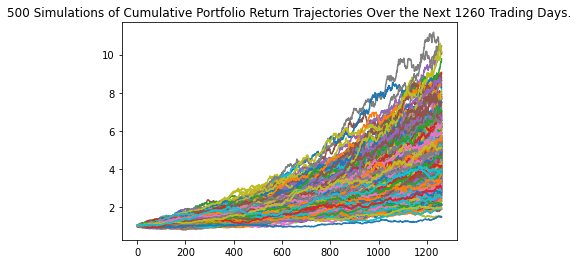

In [28]:
# Plot simulation outcomes
MC_five_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

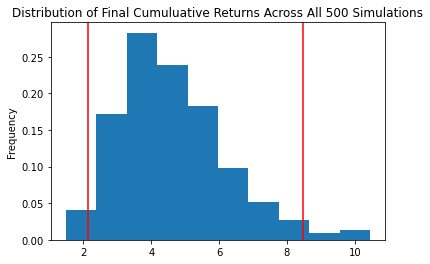

In [29]:
# Plot probability distribution and confidence intervals
MC_five_year.plot_distribution()

In [ ]:
# CODER'S NOTE: Not quite a perfect normal curve. 
# Confidence Intervals fall between 2.25 to 8.5 in my best judgement. 

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
five_yr_tbl = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(five_yr_tbl)

count           500.000000
mean              4.623747
std               1.579429
min               1.478071
25%               3.434583
50%               4.430872
75%               5.449182
max              10.450297
95% CI Lower      2.140018
95% CI Upper      8.467177
Name: 1260, dtype: float64


In [ ]:
# CODER'S NOTE:
# Our average returns [mean] is 4.6
# Risk [std] is low at 1.6
# Worst case scenario [min]: $1 invested in the portfolio can lose $1.48 in value during the five years
# Best case senario [max]: $ 1 invested in the portfolio can gain $10.45 in value during the five years.
# 95% of the time it is projected that $1 in portfolio can become $8.47 in five years. 

In [32]:
# Set initial investment
# CODER'S NOTE: I am upping the investment to 50000.
five_year_initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_yr_tbl[8] * five_year_initial_investment, 2)
ci_upper_five = round(five_yr_tbl[9] * five_year_initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${five_year_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $107000.89 and $423358.86


### Ten Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# This portfolio is 20/80, very weighted towards SPY.
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.2, .8],                                #Very weighted toward SPY.
    num_simulation = 500,
    num_trading_days = 252*10
)

In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987202,1.018646,0.996125,0.997117,1.009233,0.994612,0.981964,1.011195,0.999176,1.007844,...,1.010929,0.976124,0.995558,1.001057,1.008265,1.007144,1.002167,0.999043,0.996271,1.005871
2,0.992169,1.009194,1.000450,0.995873,1.000957,0.991274,0.984963,1.014303,1.007878,1.011290,...,1.026537,0.992820,1.007268,1.010207,1.002180,1.017948,0.984198,0.998222,0.985075,1.003857
3,1.010451,1.007366,0.995136,0.991291,1.006589,0.989514,0.990890,1.005858,0.988277,1.008557,...,1.028478,0.999917,0.992588,0.996343,1.007866,1.005598,0.973847,1.001943,0.973248,1.011615
4,1.000964,1.003863,1.000444,0.996954,1.020420,0.975109,0.995178,1.032693,0.996822,1.013727,...,1.035565,1.002074,1.009222,0.998614,0.993153,0.999653,0.969598,0.978216,0.982284,1.020629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,35.276215,25.796991,17.012809,16.207230,21.333286,18.975478,59.337917,29.992121,28.319365,8.533535,...,32.375413,27.426200,21.174611,17.814296,42.854957,25.119272,26.215491,20.221220,20.249253,57.454096
2517,35.512665,25.563451,16.960842,16.206958,21.386382,19.395551,59.521766,29.965642,28.373165,8.612219,...,32.838423,27.762325,21.496677,17.560584,42.669500,24.624227,25.951156,20.087430,20.038148,57.066133
2518,34.853120,25.566734,16.618598,16.311678,21.203099,19.434507,60.045891,30.302596,28.260605,8.809630,...,32.702626,27.375460,21.492880,17.890528,42.607371,24.204964,25.815979,20.109454,20.142434,58.120751
2519,34.833100,25.733032,16.567514,16.340034,21.552485,19.755915,60.715045,30.865584,28.542764,8.795438,...,32.229674,27.329346,21.512822,17.867124,42.667744,24.373670,25.653478,20.483661,20.298041,57.521853


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

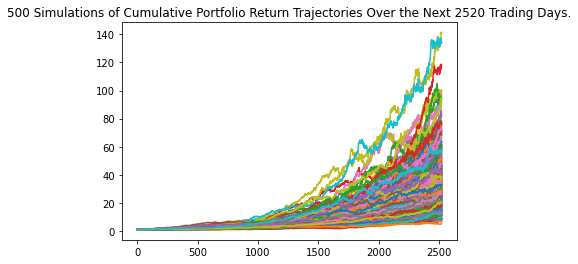

In [35]:
# Plot simulation outcomes
MC_ten_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

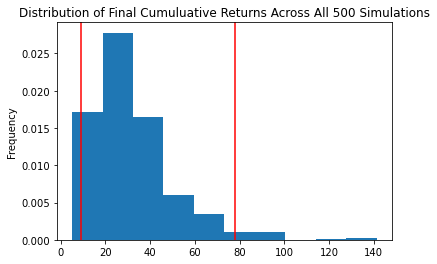

In [36]:
# Plot probability distribution and confidence intervals
MC_ten_year.plot_distribution()

In [ ]:
# CODER'S NOTE:
# This is not a normal curve.
# Confidence intervals lie between 10 and 79.90, not exactly 80, but then there's additional outliers to the right of that. 

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_tbl = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(ten_year_tbl)

count           500.000000
mean             32.000998
std              18.753223
min               5.143622
25%              19.201940
50%              27.639442
75%              40.124422
max             141.203840
95% CI Lower      9.069273
95% CI Upper     77.857778
Name: 2520, dtype: float64


In [ ]:
# CODER'S NOTE:
# Our average returns [mean] is 32
# Risk [std] is HIGH at 18.7 which is reflective in the shape of the curve which shows outliers.  
# Worst case scenario [min]: $1 invested in the portfolio can lose $5.14 in value during the TEN years
# Best case senario [max]: $ 1 invested in the portfolio can gain $141.20 in value during the TEN years.
# 95% of the time it is projected that $1 in portfolio can become $77.86 in TEN years. 

In [38]:
# Set initial investment
ten_year_initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_year_tbl[8] * ten_year_initial_investment, 2)
ci_upper_ten = round(ten_year_tbl[9] * ten_year_initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${ten_year_initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $906927.28 and $7785777.77


In [45]:
print("Summary of Retirement results")
print('*'*50)

print(f"Our original retirement goal with 60% SPY, 40% AGG Weighted, Initial Investment: {initial_investment} over goal of 30 years.")
print(f"Portfolio returns will range from ${ci_lower} to as high as ${ci_upper}")
print('*'*50)

print(f"For 60% SPY, 40% AGG Weighed, Initial Investment: ${fifty_percent_increase} upped 50% over goal of 30 years.")
print(f"Portfolio returns will range from ${new_ci_lower} to as high as ${new_ci_upper}")
print('*'*50)
      
print(f"For 70% SPY, 30% AGG Weighted, Initial Investment: ${five_year_initial_investment} over goal of five years.")
print(f"Portfolio returns will range from ${ci_lower_five} to as high as ${ci_upper_five}")
print('*'*50)

print(f"For 80% SPY, 20% AGG Weighted, Initial Investment: ${ten_year_initial_investment} over goal of ten years")
print(f"Portfolio returns will range from ${ci_lower_ten} to as high as ${ci_upper_ten}")
print('*'*50)

Summary of Retirement results
**************************************************
Our original retirement goal with 60% SPY, 40% AGG Weighted, Initial Investment: 20000 over goal of 30 years.
Portfolio returns will range from $8632088.08 to as high as $120910682.46
**************************************************
For 60% SPY, 40% AGG Weighed, Initial Investment: $30000.0 upped 50% over goal of 30 years.
Portfolio returns will range from $12948132.12 to as high as $181366023.7
**************************************************
For 70% SPY, 30% AGG Weighted, Initial Investment: $50000 over goal of five years.
Portfolio returns will range from $107000.89 to as high as $423358.86
**************************************************
For 80% SPY, 20% AGG Weighted, Initial Investment: $100000 over goal of ten years
Portfolio returns will range from $906927.28 to as high as $7785777.77
**************************************************


In [46]:
# ANALYSIS:

# Comparing our 2 original retirement options over a 30 year goal. 

# Investing 20,000 for 30 years, weighted 60/40 SPY.AGG at best can give us $121 million.
# Investing $10,000 more for the same weight 60/40 and time horizon of 30 years, we can maximize ourgain to $181 million in value.
# The difference 10,000 makes is $60 million dollars
# I strongly recommend increasing our investment of $20,000 to $30,000. That is the better return. 
# Even omn the lower bound the incrased option earns us $13 million
# While the lower bound of our original $20,000 investment is $8.6 million. 

gain_portfolio_1 = (ci_upper - initial_investment) / initial_investment
gain_portfolio_2 = (new_ci_upper - initial_investment_increase) / initial_investment_increase
impact = new_ci_upper - ci_upper

print(f"The percent gain of investing ${initial_investment:0.2f} for 30 years {gain_portfolio_1:0.2f}%")
print(f"The percent gain of investing ${initial_investment_increase:0.2f} for the same 30 years, and same weighting is {gain_portfolio_2:0.2f}%")
print(f"Simply by increasing our investment of ${initial_investment_increase - initial_investment} will potentially increase our gain by a difference of ${impact:0.2f}")
print('*'*50)

# If we decide to go with a shorter time horizons like 5-years and 10-years. The lower bounds on both options are the same as the original 20,000 30-year
print(f"If we want to go with a lower time horizon of five years, the lower bound is ${ci_lower_five:0.2f} compared to the lower bound of ${ci_lower:0.2f}")
print(f"If we opt for the ten-year option, our lower bound performance is ${ci_lower_ten} compared to our 30-year ${ci_lower:0.2f}")


The percent gain of investing $20000.00 for 30 years 6044.53%
The percent gain of investing $30000.00 for the same 30 years, and same weighting is 6044.53%
Simply by increasing our investment of $10000.0 will potentially increase our gain by a difference of $60455341.24
**************************************************
If we want to go with a lower time horizon of five years, the lower bound is $107000.89 compared to the lower bound of $8632088.08
If we opt for the ten-year option, our lower bound performance is $906927.28 compared to our 30-year $8632088.08


In [ ]:
# FINAL ANALYSIS:

# It pays to increase investment 50%, and not go with our orginal investment of $20,000.
# The initial investment the gains are vastly greater, and the lower end of that gain is still greater than the original. 
# You're taking the same level of risk regardless if you're investing 20,000 vs 30,000.
# The larger returns would be expected since we are taking on a lot of risk with the 30-year portfolio with a standard deviation of 1720.

# I attribute the greater returns with the investment based on the fact we weighted the 30-year portfolio more towards SPY. 
# Increasing the initial investment by a mere $10,000 gave extraordinary returns.

# Even if we went with a shorter time horizon of 5 or 10 years.
# We need to make these short-term more heavy towards SPY more than 60%, and with a large initial investment. To try to get a similar high bound return.

# If I can't wait 30-years then my other choice would be the 10-year portfolio. SPY being the weighted reason. 
# There's the same lower bound as 30-year option where we increased investment by 50%   

In [ ]:
# CODER'S NOTE: The code below is a side risk project I wanted to create and am working on using data from this assignment.
# The code above this cell is all related to the homework submission.
# To better run curiousities I had about this assignment. I'm re-updating my github as I find ways to run risk simulations. 

In [135]:
# CODER'S NOTE: This is additional code I added to see if I can compare the risk of all three scenarios: 30-year, 5-year, and 10-year. 
# I want to know how much risk are we taking compared between the 5, 10, 30 year portfolios, and assess if that would influence my choice in portfolio.
# So far I measured the decision on the max gain of each portfolio option. 

# Assess the risk of each weighted portfolio:
simulated_risk_all_portfolios = {
    'portfolio_30_years': list(MC_thirty_year.simulated_return.std(axis=1)),
    'portfolio_5_years': list(MC_five_year_forecast.simulated_return.std(axis=1)),
    'portfolio_10_years': list(MC_ten_year.simulated_return.std(axis=1))
}

# Put all the risk in a DataFrame
df_total_risk_comparison = pd.DataFrame(
    [simulated_risk_all_portfolios],
    columns = ['std_risk']
)

# Display
df_total_risk_comparison.head()

,std_risk
0,NaN


In [138]:
# Attempt 2 of making a risk comparison DataFrame, but it errors with too many columns returned.

#define risk variables using std from each simulated summary statistics

thirty_year_risk = list(MC_thirty_year.simulated_return.std(axis=1))
five_year_risk = list(MC_five_year_forecast.simulated_return.std(axis=1))
ten_year_risk = list(MC_ten_year.simulated_return.std(axis=1))

# Make a DataFrame
df_total_risk_comp_2 = pd.DataFrame(
    [five_year_risk, ten_year_risk, thirty_year_risk],
    ['5-year', '10-year', '30-year'],
    columns = ['risk']
)

# Display - errors. 
df_total_risk_comp_2.head()

ValueError: 1 columns passed, passed data had 7561 columns